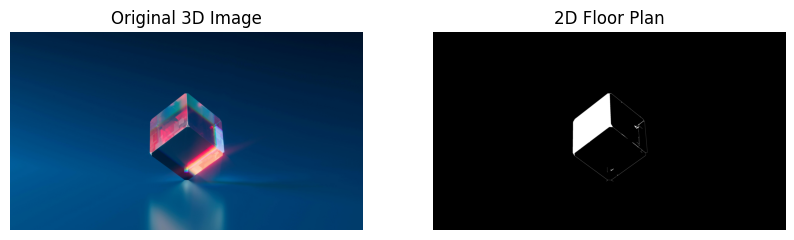

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Unable to load the image.")
        return

    # Convert the image to grayscale
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect edges using Canny
    edges = cv2.Canny(gray_img, 50, 150, apertureSize=3)

    # Close edges to form complete shapes
    kernel = np.ones((3, 3), np.uint8)
    closed_edges = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(closed_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image for the floor plan
    floor_plan = np.zeros_like(gray_img)

    # Draw contours on the blank image
    cv2.drawContours(floor_plan, contours, -1, 255, thickness=cv2.FILLED)

    # Display the original and floor plan images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original 3D Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(floor_plan, cmap='gray')
    plt.title('2D Floor Plan')
    plt.axis('off')

    plt.show()

    # Save the 2D floor plan
    cv2.imwrite("2d_floor_plan.png", floor_plan)

if __name__ == "__main__":
    image_path = "/kaggle/input/3d-images-dataset-for-testing/pexels-photo-5011647.jpeg"
    process_image(image_path)
